In [46]:
%matplotlib inline
import sys,os
sys.path.append(os.path.dirname(os.path.abspath('__file__')) + '/../')
from sac14.btcusd import cryptowat
from sac14.model import apply_min_max_scaler, create_dataset, create_rnn_model, create_lstm_model

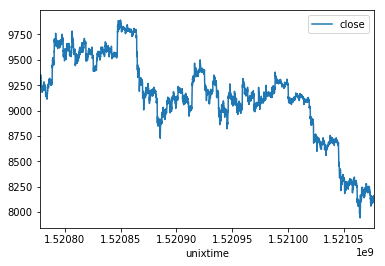

In [47]:
dataframe = cryptowat()
# 障害があったため全 6000 データのうち前半 5000 のみ使用する
dataframe = dataframe.head(5000)
dataframe.plot()

In [48]:
dataset = dataframe.values.astype('float32')
dataset, scaler = apply_min_max_scaler(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]

In [49]:
look_back = 3
train_x, train_y = create_dataset(train, look_back)
test_x, test_y = create_dataset(test, look_back)

In [50]:
rnn_model = create_rnn_model(look_back)
rnn_model.fit(train_x, train_y, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 5s - loss: 0.0056
Epoch 2/50
 - 5s - loss: 2.6160e-04
Epoch 3/50
 - 5s - loss: 2.2725e-04
Epoch 4/50
 - 4s - loss: 1.8611e-04
Epoch 5/50
 - 4s - loss: 1.7240e-04
Epoch 6/50
 - 5s - loss: 1.6037e-04
Epoch 7/50
 - 4s - loss: 1.6103e-04
Epoch 8/50
 - 4s - loss: 1.4919e-04
Epoch 9/50
 - 4s - loss: 1.4798e-04
Epoch 10/50
 - 4s - loss: 1.4059e-04
Epoch 11/50
 - 5s - loss: 1.3882e-04
Epoch 12/50
 - 5s - loss: 1.4134e-04
Epoch 13/50
 - 5s - loss: 1.4155e-04
Epoch 14/50
 - 5s - loss: 1.4081e-04
Epoch 15/50
 - 5s - loss: 1.4041e-04
Epoch 16/50
 - 5s - loss: 1.3984e-04
Epoch 17/50
 - 5s - loss: 1.3935e-04
Epoch 18/50
 - 5s - loss: 1.3716e-04
Epoch 19/50
 - 5s - loss: 1.3544e-04
Epoch 20/50
 - 5s - loss: 1.3382e-04
Epoch 21/50
 - 5s - loss: 1.3747e-04
Epoch 22/50
 - 5s - loss: 1.3589e-04
Epoch 23/50
 - 4s - loss: 1.3462e-04
Epoch 24/50
 - 4s - loss: 1.3505e-04
Epoch 25/50
 - 4s - loss: 1.3393e-04
Epoch 26/50
 - 4s - loss: 1.3101e-04
Epoch 27/50
 - 4s - loss: 1.3419e-04
Epoch 28/50
 -

In [51]:
lstm_model = create_lstm_model(look_back)
lstm_model.fit(train_x, train_y, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
 - 12s - loss: 0.0189
Epoch 2/50
 - 11s - loss: 1.8452e-04
Epoch 3/50
 - 11s - loss: 1.9157e-04
Epoch 4/50
 - 11s - loss: 1.9123e-04
Epoch 5/50
 - 10s - loss: 1.9000e-04
Epoch 6/50
 - 11s - loss: 1.8710e-04
Epoch 7/50
 - 10s - loss: 1.8062e-04
Epoch 8/50
 - 11s - loss: 1.8592e-04
Epoch 9/50
 - 11s - loss: 1.7733e-04
Epoch 10/50
 - 10s - loss: 1.7799e-04
Epoch 11/50
 - 11s - loss: 1.7060e-04
Epoch 12/50
 - 11s - loss: 1.6637e-04
Epoch 13/50
 - 12s - loss: 1.5930e-04
Epoch 14/50
 - 12s - loss: 1.5354e-04
Epoch 15/50
 - 12s - loss: 1.5176e-04
Epoch 16/50
 - 12s - loss: 1.4420e-04
Epoch 17/50
 - 12s - loss: 1.3724e-04
Epoch 18/50
 - 11s - loss: 1.3556e-04
Epoch 19/50
 - 12s - loss: 1.3576e-04
Epoch 20/50
 - 12s - loss: 1.3343e-04
Epoch 21/50
 - 12s - loss: 1.3101e-04
Epoch 22/50
 - 12s - loss: 1.3141e-04
Epoch 23/50
 - 12s - loss: 1.2784e-04
Epoch 24/50
 - 12s - loss: 1.2942e-04
Epoch 25/50
 - 12s - loss: 1.2856e-04
Epoch 26/50
 - 12s - loss: 1.2880e-04
Epoch 27/50
 - 12s - loss

In [52]:
# 平均二乗誤差のルートで評価

import math
from sklearn.metrics import mean_squared_error

test_y_inv = scaler.inverse_transform([test_y])

rnn_test_predict = rnn_model.predict(test_x)
rnn_test_predict_inv = scaler.inverse_transform(rnn_test_predict)
rnn_test_score = math.sqrt(mean_squared_error(test_y_inv[0], rnn_test_predict_inv[:,0]))
print('RNN Test RMSE: %.2f' % (rnn_test_score))

lstm_test_predict = lstm_model.predict(test_x)
lstm_test_predict_inv = scaler.inverse_transform(lstm_test_predict)
lstm_test_score = math.sqrt(mean_squared_error(test_y_inv[0], lstm_test_predict_inv[:,0]))
print('LSTM Test RMSE: %.2f' % (lstm_test_score))

RNN Test RMSE: 18.02
LSTM Test RMSE: 66.93


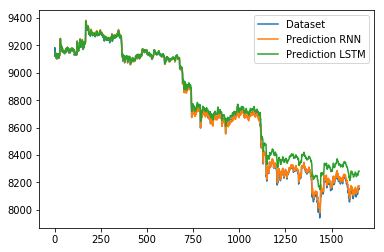

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# test.shape => (1650, 1)
# rnn_test_predict_inv.shape => (1647, 1)
# lstm_test_predict_inv.shape => (1647, 1)

test_plot = scaler.inverse_transform(test)

rnn_test_predict_plot = np.empty_like(test)
rnn_test_predict_plot[:, :] = np.nan
rnn_test_predict_plot[look_back:len(rnn_test_predict_inv)+look_back, :] = rnn_test_predict_inv

lstm_test_predict_plot = np.empty_like(test)
lstm_test_predict_plot[:, :] = np.nan
lstm_test_predict_plot[look_back:len(lstm_test_predict_inv)+look_back, :] = lstm_test_predict_inv

plt.plot(test_plot, label='Dataset')
plt.plot(rnn_test_predict_plot, label='Prediction RNN')
plt.plot(lstm_test_predict_plot, label='Prediction LSTM')
plt.legend()
plt.show()